##  Stroke Prediction Dataset

## Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

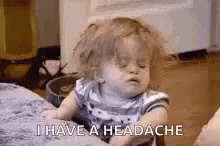

In [23]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
# dealing with the imbalance, we will over sample the dataset
from imblearn.over_sampling import RandomOverSampler
ran = RandomOverSampler()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
# Loading the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# Cheaking for null values
df.isnull().sum()

# removing the other gender
df = df[df['gender']!='Other']

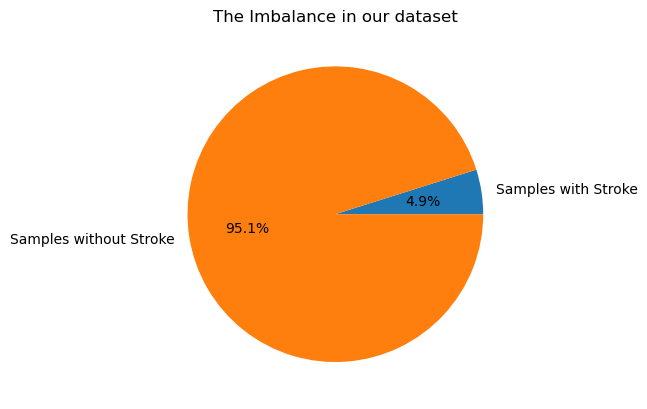

In [6]:
#Cheaking for imbalance in dataset

mylabels = ["Samples with Stroke", "Samples without Stroke"]
plt.pie([len(df[df['stroke']==1]),len(df[df['stroke']==0])], labels = mylabels,autopct='%1.1f%%')
plt.title('The Imbalance in our dataset')
plt.show()

## What I think needs to be done before EDA

1. Our dataset has null values in the 'bmi' feature
2. There is a huge imbalance which is ok in the real world, but this might train our model to be biased towards one type of class     

3. There are strings or words in our dataset that needs to be encoded into numbers as the algorithm computes numbers easily

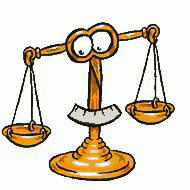

In [8]:
#Dealing with the null values in our 'bmi' column
impute = KNNImputer(n_neighbors= 3)
df['bmi'] = impute.fit_transform(df[['bmi']])
df.isnull().sum()
# Done!

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

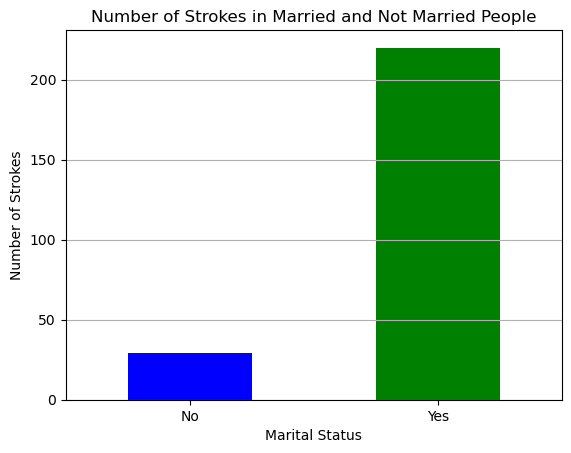

In [9]:
# Is there a relation between getting married and strokes 👻💔 

stroke_count = df.groupby('ever_married')['stroke'].sum()

# Create a bar plot
stroke_count.plot(kind='bar', color=['blue', 'green'])

# Add labels and title
plt.title('Number of Strokes in Married and Not Married People')
plt.xlabel('Marital Status')
plt.ylabel('Number of Strokes')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to y-axis

# Show the plot
plt.show()

In [10]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89456,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60000,formerly smoked,0


In [11]:
 df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

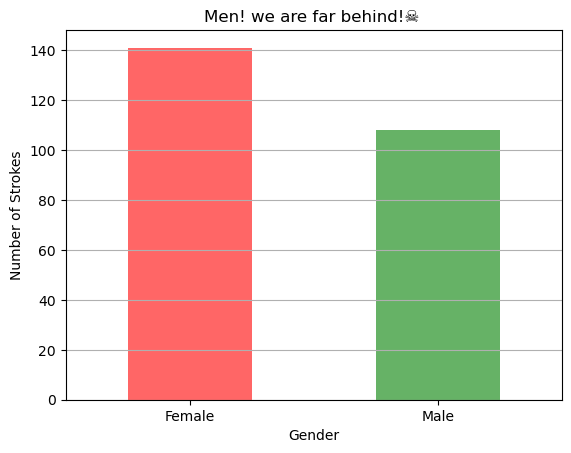

In [12]:
#Who had more strokes men or women? 👩 vs 😎
kitne_mare = df.groupby('gender')['stroke'].sum()
kitne_mare.plot(kind='bar',color=['red','green','yellow'],alpha = 0.6)

plt.title('Men! we are far behind!☠️ ')
plt.xlabel("Gender")
plt.ylabel('Number of Strokes')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

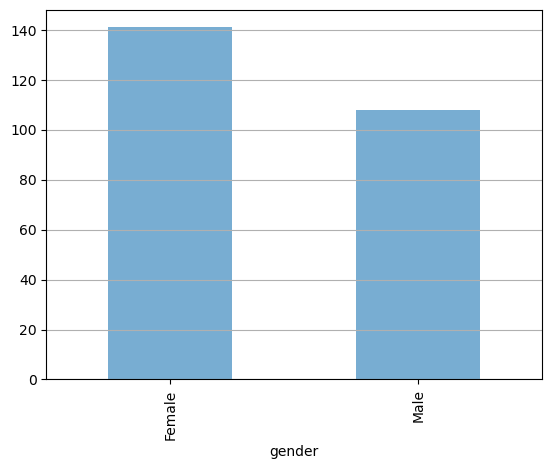

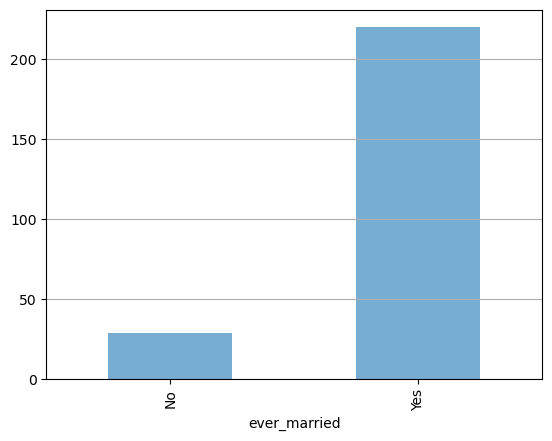

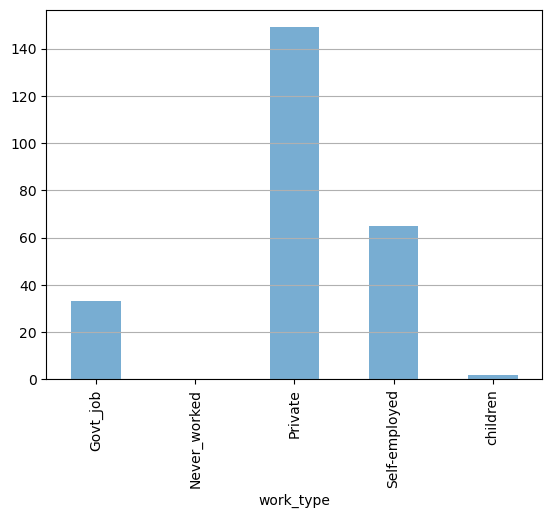

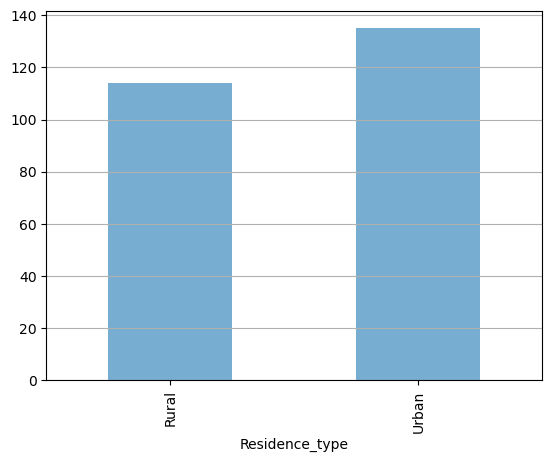

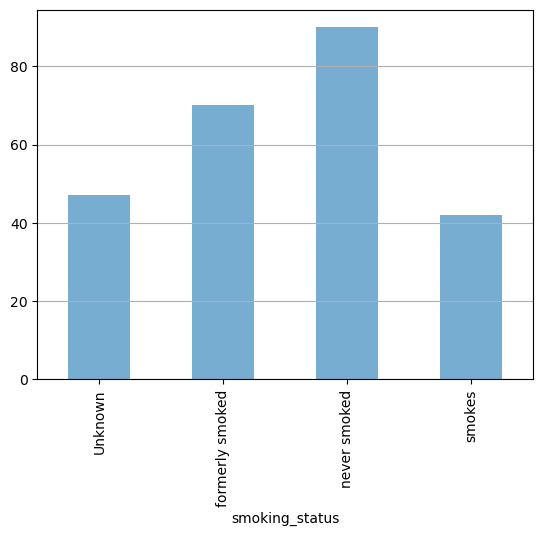

In [13]:
#ploting for all catagories
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

# For loop to plot all categories
for i in categorical:
    kitne_mare = df.groupby(i)['stroke'].sum()
    kitne_mare.plot(kind='bar',alpha = 0.6)
    plt.grid(axis='y')
    plt.show()
    

In [14]:
#I see a problem here 😩 , the label 'children' makes no sence (to me) to be in work type
print(df['work_type'].unique())

# i'll replace children with Never_worked
df['work_type'] = df['work_type'].replace('children', 'Never_worked')

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [15]:
# Label encoding and Feature Engineering
# the feature such as "gender,ever_married,work_type,Residence_type,smoking_status"...need to be encoded

#for 'gender'
df.gender = df.gender.map({'Male':0,'Female':1})

#for 'ever_married'
df.ever_married = df.ever_married.map({'No':0,'Yes':1})

#for worktype 
df.work_type = df.work_type.map({'Private':2,'Self-employed':3,'Govt_job':1,'Never_worked':0})


#for Residence
df.Residence_type = df.Residence_type.map({'Urban':1,'Rural':0})


# for smoking status

df.smoking_status = df.smoking_status.map({'smokes':3,'formerly smoked':2,'never smoked':1,'Unknown':0})


## Creating input and output

In [17]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]
x_resampled, y_resampled = ran.fit_resample(x, y)

## Spliting into training and testing

In [18]:
# Rerun this, since i'm using the same variable as above in credit card classification
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=11)

## Train the model

In [21]:
stroke_classifier = RandomForestClassifier()
stroke_classifier.fit(x_train,y_train)
y_pred = stroke_classifier.predict(x_test)



## Evaluation the model

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       931
           1       0.99      1.00      0.99      1013

    accuracy                           0.99      1944
   macro avg       0.99      0.99      0.99      1944
weighted avg       0.99      0.99      0.99      1944



## Validation

In [25]:
# WIll I have a stroke !!! 💀💀💀👻👻 

me = np.array([0,32,0,0,0,2,1,77.7,20.5,1]) # my parameters
stroke_classifier.predict([me])


array([0], dtype=int64)